<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание данных</a></span><ul class="toc-item"><li><span><a href="#Технологический-процесс" data-toc-modified-id="Технологический-процесс-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Технологический процесс</a></span></li><li><span><a href="#Параметры-этапов" data-toc-modified-id="Параметры-этапов-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Параметры этапов</a></span></li><li><span><a href="#Наименование-признаков" data-toc-modified-id="Наименование-признаков-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Наименование признаков</a></span></li></ul></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#df_train" data-toc-modified-id="df_train-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>df_train</a></span></li><li><span><a href="#df_test" data-toc-modified-id="df_test-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>df_test</a></span></li><li><span><a href="#df_full" data-toc-modified-id="df_full-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>df_full</a></span></li></ul></li><li><span><a href="#Проверка-recovery" data-toc-modified-id="Проверка-recovery-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Проверка recovery</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Построение-моделей,-выбор-лучшей" data-toc-modified-id="Построение-моделей,-выбор-лучшей-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Построение моделей, выбор лучшей</a></span><ul class="toc-item"><li><span><a href="#LinearRegression" data-toc-modified-id="LinearRegression-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>LinearRegression</a></span></li><li><span><a href="#RandomForestRegressor" data-toc-modified-id="RandomForestRegressor-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>RandomForestRegressor</a></span></li><li><span><a href="#Проверка-на-тестовых-данных:" data-toc-modified-id="Проверка-на-тестовых-данных:-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Проверка на тестовых данных:</a></span></li></ul></li><li><span><a href="#Тест-на-адекватность:" data-toc-modified-id="Тест-на-адекватность:-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Тест на адекватность:</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

# Восстановление золота из руды

Предоставлены данные по технологическому процессу восстановления золота из золотосодержащей руды. Эти данные содержат параметры добычи и очистки золота.

Цель проекта: построить модель, которая будет предсказывать  коэффициент восстановления золота из золотосодержащей руды.

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Этапы работы :
 - Подготовить данные;
 - Провести исследовательский анализ данных;
 - Построить и обучить модель.

## Описание данных

### Технологический процесс

`Rougher feedz` — исходное сырье

`Rougher additions` (или reagent additions) — флотационные реагенты: Xanthate, Sulphate, Depressant

    Xanthate — ксантогенат (промотер, или активатор флотации);

    Sulphate — сульфат (на данном производстве сульфид натрия);

    Depressant — депрессант (силикат натрия).
    
`Rougher process` (англ. «грубый процесс») — флотация

`Rougher tails` — отвальные хвосты

`Float banks` — флотационная установка

`Cleaner process` — очистка

`Rougher Au` — черновой концентрат золота

`Final Au` — финальный концентрат золота

### Параметры этапов

`air amount` — объём воздуха

`fluid levels` — уровень жидкости

`feed size` — размер гранул сырья

`feed rate` — скорость подачи

### Наименование признаков

Наименование признаков должно быть такое:

**[этап].[тип_параметра].[название_параметра]**

Пример: rougher.input.feed_ag

Возможные значения для блока **[этап]:**

`rougher` — флотация

`primary_cleaner` — первичная очистка

`secondary_cleaner` — вторичная очистка

`final` — финальные характеристики

Возможные значения для блока **[тип_параметра]:**

`input` — параметры сырья

`output` — параметры продукта

`state` — параметры, характеризующие текущее состояние этапа

`calculation` — расчётные характеристики

## Подготовка данных

In [1]:
import pandas as pd
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [2]:
df_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
df_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
df_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')

### df_train

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


In [4]:
display(df_train)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14144,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
14145,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
14146,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
14147,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471


In [5]:
df_train['date'] = pd.to_datetime(df_train['date'], format='%Y-%m-%d %H:%M:%S')
df_train['weekday'] = df_train['date'].dt.weekday
df_train['hour'] = df_train['date'].dt.hour
df_train['minute'] = df_train['date'].dt.minute

In [6]:
print(df_train.duplicated().sum())

0


In [7]:
df_train = df_train.dropna()

### df_test

In [8]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

In [9]:
display(df_test)

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5285,2017-12-31 19:59:59,173.957757,15.963399,8.070000,0.896701,1401.930554,-499.728848,1401.441445,-499.193423,1399.810313,...,13.995957,-500.157454,12.069155,-499.673279,7.977259,-499.516126,5.933319,-499.965973,8.987171,-499.755909
5286,2017-12-31 20:59:59,172.910270,16.002605,8.070000,0.896519,1447.075722,-494.716823,1448.851892,-465.963026,1443.890424,...,16.749781,-496.031539,13.365371,-499.122723,9.288553,-496.892967,7.372897,-499.942956,8.986832,-499.903761
5287,2017-12-31 21:59:59,171.135718,15.993669,8.070000,1.165996,1498.836182,-501.770403,1499.572353,-495.516347,1502.749213,...,19.994130,-499.791312,15.101425,-499.936252,10.989181,-498.347898,9.020944,-500.040448,8.982038,-497.789882
5288,2017-12-31 22:59:59,179.697158,15.438979,8.070000,1.501068,1498.466243,-500.483984,1497.986986,-519.200340,1496.569047,...,19.958760,-499.958750,15.026853,-499.723143,11.011607,-499.985046,9.009783,-499.937902,9.012660,-500.154284


In [10]:
df_test['date'] = pd.to_datetime(df_test['date'], format='%Y-%m-%d %H:%M:%S')
df_test['weekday'] = df_test['date'].dt.weekday
df_test['hour'] = df_test['date'].dt.hour
df_test['minute'] = df_test['date'].dt.minute

In [11]:
print(df_test.duplicated().sum())

0


In [12]:
df_test = df_test.dropna()

### df_full

In [13]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


In [14]:
display(df_full)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19434,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
19435,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
19436,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
19437,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471


In [15]:
df_full['date'] = pd.to_datetime(df_full['date'], format='%Y-%m-%d %H:%M:%S')
df_full['weekday'] = df_full['date'].dt.weekday
df_full['hour'] = df_full['date'].dt.hour
df_full['minute'] = df_full['date'].dt.minute

In [16]:
print(df_full.duplicated().sum())

0


In [17]:
df_full = df_full.dropna()

## Проверка recovery

**Функция для расчета recovery:**

In [18]:
def recovery(data):
    
    C = data['rougher.output.concentrate_au']
    
    F = data['rougher.input.feed_au']
        
    T = data['rougher.output.tail_au']
    
    recovery = (C * (F - T)) / (F * (C - T)) * 100
    
    return recovery

**Расчет recovery по формуле:**

In [19]:
print(recovery(df_train)) 

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
14144    89.574376
14145    87.724007
14146    88.890579
14147    89.858126
14148    89.514960
Length: 11017, dtype: float64


Расчет MAE

In [20]:
print(mean_absolute_error(df_train['rougher.output.recovery'], recovery(df_train)))

9.82970122149377e-15


**Вывод:**

Среднее абсолютное отклонение иимеет очень маленькую величину, это говорит о том, что данные в столбце `rougher.output.recovery` посчитаны верно. 

## Анализ данных

In [21]:
print('Число столбцев в тренировочных данных', len(df_train.columns))
print('Число столбцев в тестовых данных', len(df_test.columns))

Число столбцев в тренировочных данных 90
Число столбцев в тестовых данных 56


**Разница между тренировочными и тестовыми данными:**

In [22]:

diff = list(set(df_train.columns.values) - set(df_test.columns.values))
display(df_train[diff])
print()
df_train[diff].info()


,primary_cleaner.output.tail_sol,final.output.concentrate_sol,rougher.output.tail_sol,rougher.output.tail_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.tail_ag,final.output.recovery,rougher.output.tail_ag,final.output.concentrate_au,final.output.tail_ag,...,secondary_cleaner.output.tail_au,rougher.output.tail_au,secondary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,rougher.calculation.floatbank10_sulfate_to_au_feed,final.output.concentrate_ag,rougher.output.recovery,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.output.concentrate_au,rougher.calculation.sulfate_to_au_concentrate
0,7.476074,5.507324,19.154297,0.508728,19.529297,14.936526,70.541216,5.008018,42.192020,10.411962,...,2.606185,1.170244,8.764648,2.106679,3481.779053,6.055403,87.107763,3520.337158,19.793808,41885.707031
1,6.733907,5.257781,18.965234,0.536689,19.369147,16.250511,69.266198,4.955378,42.701629,10.462676,...,2.488248,1.184827,9.001494,2.353017,3498.370979,6.029369,86.843261,3489.981857,20.050975,42050.861809
2,6.471768,5.383759,18.808533,0.546416,19.167579,16.491823,68.116445,4.843460,42.657501,10.507046,...,2.458187,1.162562,8.842896,2.416800,3495.348910,6.055926,86.842308,3502.359819,19.737170,42018.101184
3,6.843791,4.858634,19.330200,0.542525,15.978538,16.024359,68.347543,4.655288,42.689819,10.422762,...,2.322062,1.079755,9.122857,2.262051,3498.578313,6.047977,87.226430,3499.162912,19.320810,42029.447991
4,6.550154,4.939416,19.267422,0.515438,19.199864,16.480185,66.927016,4.552800,42.774141,10.360302,...,2.330448,1.012642,8.871028,2.277073,3494.800771,6.148599,86.688794,3506.679315,19.216101,42125.354245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14144,3.934320,6.803482,16.666590,0.612935,7.056338,22.854592,73.755150,4.207261,46.713954,8.769645,...,0.000000,0.748633,0.000000,2.314352,2497.652954,3.224920,89.574376,2499.177950,18.603550,45912.942619
14145,4.089124,6.862249,16.960649,0.650557,7.542264,23.002490,69.049291,4.177943,46.866780,8.897321,...,0.000000,0.771582,0.000000,2.462890,2614.403937,3.195978,87.724007,2518.550078,18.441436,46200.099585
14146,4.457457,6.886013,18.323080,0.636095,7.941900,22.298149,67.002189,4.050010,46.795691,8.529606,...,0.000000,0.685059,0.000000,2.612231,2510.813545,3.109998,88.890579,2510.142433,15.111231,44585.181334
14147,3.557121,6.799433,19.423740,0.625609,6.942972,22.714656,65.523246,3.902494,46.408188,8.777171,...,0.000000,0.567130,0.000000,2.800648,2507.572494,3.367241,89.858126,2507.723361,17.834772,44084.735708



<class 'pandas.core.frame.DataFrame'>
Int64Index: 11017 entries, 0 to 14148
Data columns (total 34 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   primary_cleaner.output.tail_sol                     11017 non-null  float64
 1   final.output.concentrate_sol                        11017 non-null  float64
 2   rougher.output.tail_sol                             11017 non-null  float64
 3   rougher.output.tail_pb                              11017 non-null  float64
 4   primary_cleaner.output.concentrate_sol              11017 non-null  float64
 5   primary_cleaner.output.tail_ag                      11017 non-null  float64
 6   final.output.recovery                               11017 non-null  float64
 7   rougher.output.tail_ag                              11017 non-null  float64
 8   final.output.concentrate_au                         11017 non-null  float64

**Вывод:**

Разница в тренировочных данных и тестовых заклюяается в то, что в тренировочных данных содержатся данные о output — параметрах продукта, а не только о параметрах сырья. Соответственно, манипуляции над сырьем на тренировочных данных уже проведены.

График 4х концентраций (rougher.input.feed_…, rougher.output.concentrate_…, primary_cleaner.output.concentrate_…, final.output.concentrate_…) для Au, Ag, Pb

Au

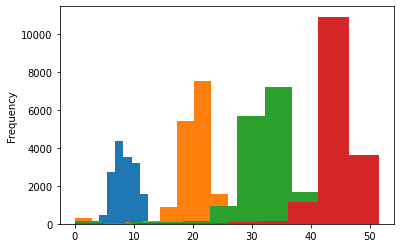

In [23]:
df_full['rougher.input.feed_au'].plot(kind='hist')
df_full['rougher.output.concentrate_au'].plot(kind='hist') 
df_full['primary_cleaner.output.concentrate_au'].plot(kind='hist')
df_full['final.output.concentrate_au'].plot(kind='hist') 
plt.show()

Ag

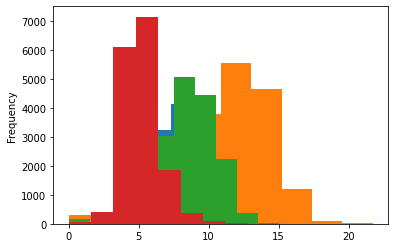

In [24]:
df_full['rougher.input.feed_ag'].plot(kind='hist')
df_full['rougher.output.concentrate_ag'].plot(kind='hist') 
df_full['primary_cleaner.output.concentrate_ag'].plot(kind='hist')
df_full['final.output.concentrate_ag'].plot(kind='hist') 
plt.show()

Pb

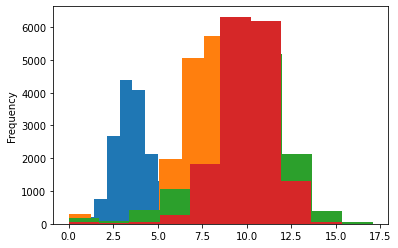

In [25]:
df_full['rougher.input.feed_pb'].plot(kind='hist')
df_full['rougher.output.concentrate_pb'].plot(kind='hist') 
df_full['primary_cleaner.output.concentrate_pb'].plot(kind='hist')
df_full['final.output.concentrate_pb'].plot(kind='hist') 
plt.show()

feed size

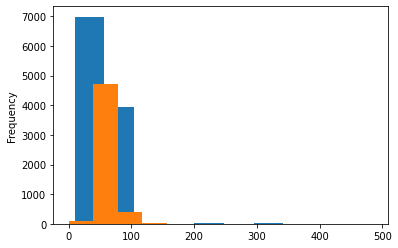

In [26]:
#rougher.input.feed_size

df_train['rougher.input.feed_size'].plot(kind='hist')
df_test['rougher.input.feed_size'].plot(kind='hist')
plt.show()

**Вывод:**

Исходя из графика распределния гранул на обучающей и тестовой выборке, видно, что эти распределения имеют схожую структуру. Оценка модели будет правильна.

In [27]:
df_train['rougher.output.concentrate_f'] = df_train['rougher.output.concentrate_au'] + df_train['rougher.output.concentrate_ag'] + df_train['rougher.output.concentrate_pb'] + df_train['rougher.output.concentrate_sol']


In [28]:
df_train['primary_cleaner.output.concentrate_f'] = df_train['primary_cleaner.output.concentrate_au'] + df_train['primary_cleaner.output.concentrate_ag'] + df_train['primary_cleaner.output.concentrate_pb'] + df_train['primary_cleaner.output.concentrate_sol']


In [29]:
df_train['final.output.concentrate_f'] = df_train['final.output.concentrate_au'] + df_train['final.output.concentrate_ag'] + df_train['final.output.concentrate_pb'] + df_train['final.output.concentrate_sol']


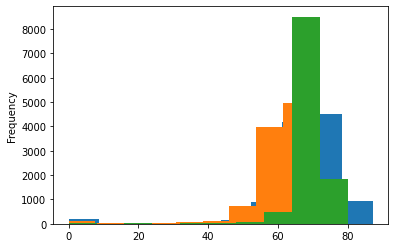

In [30]:
df_train['rougher.output.concentrate_f'].plot(kind='hist')
df_train['primary_cleaner.output.concentrate_f'].plot(kind='hist')
df_train['final.output.concentrate_f'].plot(kind='hist')
plt.show()

In [31]:
df_train = df_train.loc[df_train.loc[:, 'final.output.concentrate_f'] > 0]


In [32]:
df_train = df_train.loc[df_train.loc[:, 'rougher.output.concentrate_f'] > 0]

In [33]:
df_train = df_train.loc[df_train.loc[:, 'primary_cleaner.output.concentrate_f'] > 0]

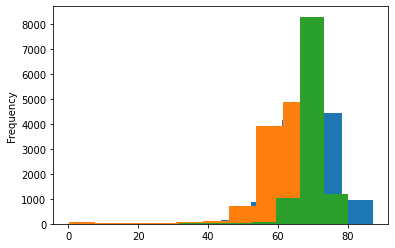

In [34]:
df_train['rougher.output.concentrate_f'].plot(kind='hist')
df_train['primary_cleaner.output.concentrate_f'].plot(kind='hist')
df_train['final.output.concentrate_f'].plot(kind='hist')
plt.show()

**Вывод:**

Выявлены нулевые аномалии в суммарных концентрациях.

Избавились от этих аномалий.

## Построение моделей, выбор лучшей

**Данные для обучающей модели:**

In [35]:
df_train_new = df_train[df_test.columns]

In [36]:
df_train_new['rougher.output.recovery'] = df_train['rougher.output.recovery']
df_train_new['final.output.recovery'] = df_train['final.output.recovery']
df_train_new = df_train_new.drop('date', axis=1)
df_train_new = df_train_new.dropna()

/tmp/ipykernel_164/2581044545.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_new['rougher.output.recovery'] = df_train['rougher.output.recovery']
/tmp/ipykernel_164/2581044545.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_new['final.output.recovery'] = df_train['final.output.recovery']


**Функции расчета метрики качества модели для нашей задачи:**

In [37]:
#sMAPE

def sMAPE(target, predictions):
    target = target.reset_index(drop=True)
    s = 0
    for i in range(len(target)):
        s += (abs(target[i] - predictions[i])) / ((abs(target[i]) + abs(predictions[i])) / 2)
        
    sMAPE = (1 / len(target)) * s  * 100
    
    return sMAPE        

In [38]:
def sMAPE_total(sMAPE1, sMAPE2):
    sMAPE_total = (25 * sMAPE1 + 75 * sMAPE2) / 100
    return sMAPE_total

In [39]:
custom_scorer = make_scorer(sMAPE)

In [40]:
target1 = df_train_new['rougher.output.recovery']
target2 = df_train_new['final.output.recovery']

features = df_train_new.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)






### LinearRegression

In [41]:
model = LinearRegression()

In [42]:
scores1 = cross_val_score(model, features, target1, cv=5, scoring=custom_scorer)
final_score1 = sum(scores1) / len(scores1)

In [43]:
scores2 = cross_val_score(model, features, target2, cv=5, scoring=custom_scorer)
final_score2 = sum(scores2) / len(scores2)

In [44]:
print(sMAPE_total(final_score1, final_score2))

8.231517968481336


### RandomForestRegressor

In [45]:
best_result = 100
best_est = 0
best_depth = 0

for est in range(1, 5):
    for depth in range (1, 5):
        model = RandomForestRegressor(random_state=12345, max_depth=depth, n_estimators=est)
        scores1 = cross_val_score(model, features, target1, cv=5, scoring=custom_scorer)
        final_score1 = sum(scores1) / len(scores1)
        scores2 = cross_val_score(model, features, target2, cv=5, scoring=custom_scorer)
        final_score2 = sum(scores2) / len(scores2)
        scor_total = sMAPE_total(final_score1, final_score2)

        result = scor_total
        if result < best_result:
            best_model = model
            best_result = result
            best_est = est
            best_depth = depth
                    
print(best_result, 'best_est:', best_est, 'best_depth:', best_depth)


7.891511513950695 best_est: 4 best_depth: 1


In [46]:
model = RandomForestRegressor(random_state=12345, max_depth=1, n_estimators=4)

In [47]:
scores1 = cross_val_score(model, features, target1, cv=5, scoring=custom_scorer)
final_score1 = sum(scores1) / len(scores1)

In [48]:
scores2 = cross_val_score(model, features, target2, cv=5, scoring=custom_scorer)
final_score2 = sum(scores2) / len(scores2)

In [49]:
print(sMAPE_total(final_score1, final_score2))

7.891511513950695


### Проверка на тестовых данных:

In [50]:
df_full_diff = df_full[['date', 'rougher.output.recovery', 'final.output.recovery']]

In [51]:
df_test = df_test.merge(df_full_diff, on='date', how='left')

In [52]:
df_test = df_test.drop('date', axis=1)
df_test = df_test.dropna()
df_test = df_test.reset_index(drop=True)


In [53]:
target1_test = df_test['rougher.output.recovery']
target2_test = df_test['final.output.recovery']

features_test = df_test.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)

In [54]:
scores1 = cross_val_score(model, features_test, target1_test, cv=5, scoring=custom_scorer)
final_score1 = sum(scores1) / len(scores1)

In [55]:
scores2 = cross_val_score(model, features_test, target2_test, cv=5, scoring=custom_scorer)
final_score2 = sum(scores2) / len(scores2)

**Лучший sMAPE_total на тестовой модели:**

In [56]:
print(sMAPE_total(final_score1, final_score2))

8.382419991136407


## Тест на адекватность:

In [57]:
predict1 = df_train['rougher.output.recovery'] * 0 + 1 * df_train['rougher.output.recovery'].median()
predict2 = df_train['final.output.recovery'] * 0 + 1 * df_train['final.output.recovery'].median()
predict1 = predict1.reset_index(drop=True)
predict2 = predict2.reset_index(drop=True)

Предсказания - медианное значение таргета

In [58]:
print(sMAPE_total(sMAPE(target1[:len(predict1)], predict1), sMAPE(target2[:len(predict2)], predict2)))

8.466802439892165


**Вывод:**

Итоговое sMAPE на константных предсказаниях: 8.466, на тестовых данных: 8.38. Из этого следует, что наша модель предсказыает результат лучше, чем просто медианное значения таргетного показателя. 

## Вывод 

Данные обработаны, проведен их анализ. 

Целевой признак `recovery` проверен.  

Написаны функции для расчета метрики качества для данной задачи.

Построена модель RandomForestRegressor(random_state=12345, max_depth=1, n_estimators=4) для предсказания целевых признаков `rougher.output.recovery` и `final.output.recovery`.

Модель прошла тест на адекватность.

Вот такие дела.